# Step 0: Project Setup

In this notebook, we will analyse the Olist e-commerce dataset to understand the relationship between product prices and quantities sold. Our goal is to estimate price elasticity of demand and simulate potential revenue under different pricing scenarios to derive optimal pricing strategies.


In [1]:
# ## Step 0: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisation settings
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)


#  Step 1: Load Datasets

We will load the required CSV files from the Olist dataset, including:

- Customers
- Orders
- Order Items
- Products
- Sellers

This will allow us to merge product-level pricing data with quantity sold per order.


In [2]:
# Step 1: Load Datasets

# Adjust file paths to your Mac local Downloads directory
customers = pd.read_csv('/Users/aditya/Downloads/olist_customers_dataset.csv')
order_items = pd.read_csv('/Users/aditya/Downloads/olist_order_items_dataset.csv')
orders = pd.read_csv('/Users/aditya/Downloads/olist_orders_dataset.csv')
products = pd.read_csv('/Users/aditya/Downloads/olist_products_dataset.csv')
sellers = pd.read_csv('/Users/aditya/Downloads/olist_sellers_dataset.csv')

# Confirm successful loading
print("Datasets loaded successfully.")


Datasets loaded successfully.


# Step 2: Initial Data Exploration

We will check the shape of each dataset to understand their dimensions and preview the first few rows to identify relevant columns for our analysis.


In [3]:
# Step 2: Dataset Shapes

print("Customers:", customers.shape)
print("Order Items:", order_items.shape)
print("Orders:", orders.shape)
print("Products:", products.shape)
print("Sellers:", sellers.shape)


Customers: (99441, 5)
Order Items: (112650, 7)
Orders: (99441, 8)
Products: (32951, 9)
Sellers: (3095, 4)


In [4]:
# Step 2.1: Preview Order Items Dataset

order_items.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
# Step 2.2: Preview Products Dataset

products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


# Step 3: Data Cleaning and Preparation

To analyse price elasticity, we need:

- Product price information
- Quantity sold per product

We will merge the `order_items` and `products` datasets to combine unit price and product category details. We will also inspect for missing values and ensure data types are appropriate for analysis.


In [6]:
# Step 3: Check for Missing Values

print("Missing values in order_items:")
print(order_items.isnull().sum())

print("\nMissing values in products:")
print(products.isnull().sum())


Missing values in order_items:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing values in products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


# Step 3.1: Merge Order Items with Products

We will merge these two datasets on `product_id` to prepare for price vs quantity analysis.


In [7]:
# Step 3.1: Merge datasets

order_items_merged = pd.merge(order_items, products, on='product_id', how='left')

# Check the shape and preview merged data
print("Merged dataset shape:", order_items_merged.shape)
order_items_merged.head()


Merged dataset shape: (112650, 15)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


# Step 3.2: Data Type Verification

We will confirm the data types of relevant columns to ensure they are suitable for analysis.


In [8]:
# Step 3.2: Check data types

order_items_merged.dtypes


order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date            object
price                         float64
freight_value                 float64
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

# Step 3.3: Filter Relevant Columns

For this analysis, we only need:

- product_id
- price (order_items' `price`)
- quantity (order_items' `order_item_id` counts per product, since each row is one unit sold)
- product_category_name

We will create a simplified dataframe with these columns.


In [9]:
# Step 3.3: Prepare pricing dataframe

pricing_df = order_items_merged[['product_id', 'price', 'product_category_name']]

# Since each row represents one unit sold, we will later aggregate quantity by counting rows per product and calculate average price if needed.
pricing_df.head()


,product_id,price,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao
3,7634da152a4610f1595efa32f14722fc,12.99,perfumaria
4,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim


# Step 4: Data Aggregation for EDA

Now that I have merged the order items with product details, I will aggregate the data to prepare for exploratory analysis.

My goal here is to:

- Calculate the total quantity sold per product.
- Calculate the average selling price per product.

This will help me analyse how price influences quantity sold across products.


In [11]:
# Step 4: Aggregate data for each product

# Calculate total quantity sold per product
quantity_df = order_items_merged.groupby('product_id').agg(
    total_quantity_sold=('order_id', 'count'),
    average_price=('price', 'mean'),
    product_category=('product_category_name', 'first')
).reset_index()

# Check the shape and preview
print("Aggregated data shape:", quantity_df.shape)
quantity_df.head()


Aggregated data shape: (32951, 4)


,product_id,total_quantity_sold,average_price,product_category
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,perfumaria
1,00088930e925c41fd95ebfe695fd2655,1,129.90,automotivo
2,0009406fd7479715e4bef61dd91f2462,1,229.00,cama_mesa_banho
3,000b8f95fcb9e0096488278317764d19,2,58.90,utilidades_domesticas
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,relogios_presentes


# Step 4.1: Check for Zero or Negative Prices

I will check if there are any products with zero or negative prices, as they are not valid for this analysis.


In [12]:
# Step 4.1: Check for zero or negative prices

quantity_df[quantity_df['average_price'] <= 0]


,product_id,total_quantity_sold,average_price,product_category


# Step 5: Exploratory Data Analysis (EDA)

I will now create scatterplots to visualise the relationship between average price and total quantity sold for each product.

This will give me an initial understanding of the price-demand pattern before running regression models to calculate elasticity.


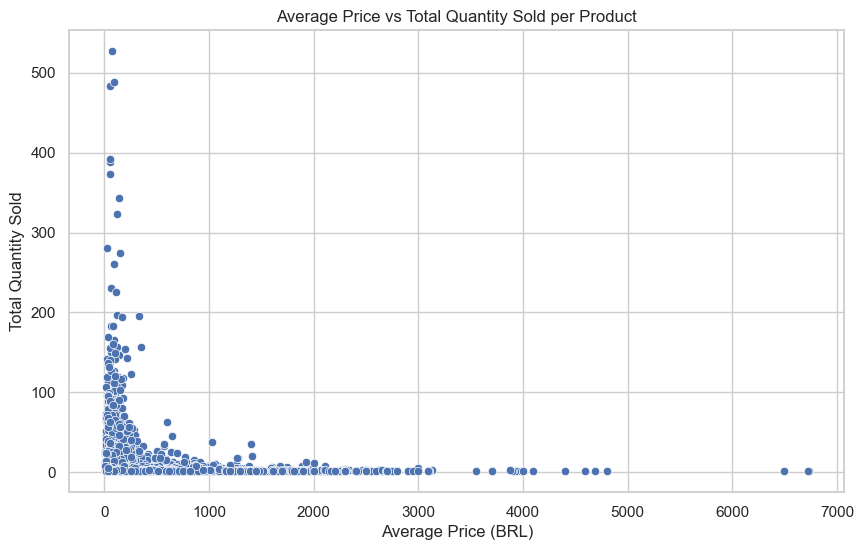

In [13]:
# Step 5: Scatterplot of Price vs Quantity Sold

plt.figure(figsize=(10,6))
sns.scatterplot(data=quantity_df, x='average_price', y='total_quantity_sold')
plt.title('Average Price vs Total Quantity Sold per Product')
plt.xlabel('Average Price (BRL)')
plt.ylabel('Total Quantity Sold')
plt.show()


# Step 6: Price Elasticity Modelling

To estimate price elasticity of demand, I will run a log-log regression model where:

- The dependent variable is log(total quantity sold)
- The independent variable is log(average price)

The coefficient from this model will directly give me the price elasticity of demand, indicating how a 1% change in price affects the quantity sold in percentage terms.


In [14]:
# Step 6: Import statsmodels for regression

import statsmodels.api as sm

# Prepare data for regression

# Remove products with zero quantity sold to avoid log(0) issues
regression_df = quantity_df[quantity_df['total_quantity_sold'] > 0].copy()

# Apply log transformation
regression_df['log_quantity'] = np.log(regression_df['total_quantity_sold'])
regression_df['log_price'] = np.log(regression_df['average_price'])

# Check transformed data
regression_df.head()


,product_id,total_quantity_sold,average_price,product_category,log_quantity,log_price
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,perfumaria,0.000000,4.621536
1,00088930e925c41fd95ebfe695fd2655,1,129.90,automotivo,0.000000,4.866765
2,0009406fd7479715e4bef61dd91f2462,1,229.00,cama_mesa_banho,0.000000,5.433722
3,000b8f95fcb9e0096488278317764d19,2,58.90,utilidades_domesticas,0.693147,4.075841
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,relogios_presentes,0.000000,5.293305


# Step 6.1: Run Log-Log Regression

I will run an OLS regression using statsmodels to estimate the elasticity coefficient.


In [15]:
# Step 6.1: Define X and y

X = regression_df['log_price']
y = regression_df['log_quantity']

# Add constant for intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           log_quantity   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     164.4
Date:                Wed, 09 Jul 2025   Prob (F-statistic):           1.49e-37
Time:                        21:53:32   Log-Likelihood:                -41563.
No. Observations:               32951   AIC:                         8.313e+04
Df Residuals:                   32949   BIC:                         8.315e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8698      0.021     41.720      0.0

# Step 6.2: Interpret Elasticity Coefficient

I will interpret the coefficient of log_price from the regression summary to understand:

- If elasticity is greater than 1 (elastic demand)
- If elasticity is less than 1 (inelastic demand)
- The direction of impact (should be negative for normal goods)

Check out Google Doc for more detail

# Step 7: Revenue Simulation

I want to understand how revenue would change if I increase prices by 5%, 10%, or 20%.

Since revenue = price * quantity, and quantity changes with price elasticity, I will:

1. Calculate the new price (original price * (1 + percentage increase)).
2. Calculate the expected new quantity using the elasticity formula:
   
   % change in quantity = elasticity * % change in price

3. Calculate new quantity = original quantity * (1 + % change in quantity).

4. Calculate new revenue = new price * new quantity.

5. Compare it to current revenue to decide the optimal price adjustment.


In [17]:
# Step 7: Define simulation function

def simulate_revenue(df, price_increase_pct, elasticity):
    df = df.copy()
    df['new_price'] = df['average_price'] * (1 + price_increase_pct)
    df['expected_qty_change_pct'] = elasticity * price_increase_pct
    df['new_quantity'] = df['total_quantity_sold'] * (1 + df['expected_qty_change_pct'])
    df['current_revenue'] = df['average_price'] * df['total_quantity_sold']
    df['new_revenue'] = df['new_price'] * df['new_quantity']
    df['revenue_change_pct'] = (df['new_revenue'] - df['current_revenue']) / df['current_revenue'] * 100
    total_current_revenue = df['current_revenue'].sum()
    total_new_revenue = df['new_revenue'].sum()
    revenue_change = total_new_revenue - total_current_revenue
    revenue_change_pct = revenue_change / total_current_revenue * 100
    print(f"Total current revenue: {total_current_revenue:,.2f}")
    print(f"Total new revenue with {price_increase_pct*100:.0f}% price increase: {total_new_revenue:,.2f}")
    print(f"Absolute revenue change: {revenue_change:,.2f}")
    print(f"Percentage revenue change: {revenue_change_pct:.2f}%")
    return df

# Step 7.1: Simulate for 5%, 10%, and 20% price increases

print("5% Price Increase Simulation:")
simulate_revenue(quantity_df, 0.05, -0.0592)

print("\n10% Price Increase Simulation:")
simulate_revenue(quantity_df, 0.10, -0.0592)

print("\n20% Price Increase Simulation:")
simulate_revenue(quantity_df, 0.20, -0.0592)


5% Price Increase Simulation:
Total current revenue: 13,591,643.70
Total new revenue with 5% price increase: 14,228,983.06
Absolute revenue change: 637,339.36
Percentage revenue change: 4.69%

10% Price Increase Simulation:
Total current revenue: 13,591,643.70
Total new revenue with 10% price increase: 14,862,299.29
Absolute revenue change: 1,270,655.59
Percentage revenue change: 9.35%

20% Price Increase Simulation:
Total current revenue: 13,591,643.70
Total new revenue with 20% price increase: 16,116,862.37
Absolute revenue change: 2,525,218.67
Percentage revenue change: 18.58%


,product_id,total_quantity_sold,average_price,product_category,new_price,expected_qty_change_pct,new_quantity,current_revenue,new_revenue,revenue_change_pct
0,00066f42aeeb9f3007548bb9d3f33c38,1,101.65,perfumaria,121.980,-0.01184,0.98816,101.65,120.535757,18.5792
1,00088930e925c41fd95ebfe695fd2655,1,129.90,automotivo,155.880,-0.01184,0.98816,129.90,154.034381,18.5792
2,0009406fd7479715e4bef61dd91f2462,1,229.00,cama_mesa_banho,274.800,-0.01184,0.98816,229.00,271.546368,18.5792
3,000b8f95fcb9e0096488278317764d19,2,58.90,utilidades_domesticas,70.680,-0.01184,1.97632,117.80,139.686298,18.5792
4,000d9be29b5207b54e86aa1b1ac54872,1,199.00,relogios_presentes,238.800,-0.01184,0.98816,199.00,235.972608,18.5792
...,...,...,...,...,...,...,...,...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,2,114.99,cool_stuff,137.988,-0.01184,1.97632,229.98,272.708444,18.5792
32947,fff81cc3158d2725c0655ab9ba0f712c,1,90.00,beleza_saude,108.000,-0.01184,0.98816,90.00,106.721280,18.5792
32948,fff9553ac224cec9d15d49f5a263411f,1,32.00,fashion_bolsas_e_acessorios,38.400,-0.01184,0.98816,32.00,37.945344,18.5792
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,5,33.99,informatica_acessorios,40.788,-0.01184,4.94080,169.95,201.525350,18.5792
